# Objetivo do projeto:

prever alunos que vão desistir do curso de uma universidade

## Analise exploratoria

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data_bases_alura/dados_estudantes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [ ]:
df.describe().round(1)

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0
mean,23.3,11.6,1.2,0.0,0.7,6.3,8.3,4.7,10.6,0.1,0.5,6.2,8.1,4.4,10.2,0.2
std,7.6,2.7,1.4,2.3,2.4,2.5,4.2,3.1,4.8,0.7,1.9,2.2,3.9,3.0,5.2,0.8
min,17.0,7.6,-0.8,-4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.0,9.4,0.3,-1.7,0.0,5.0,6.0,3.0,11.0,0.0,0.0,5.0,6.0,2.0,10.8,0.0
50%,20.0,11.1,1.4,0.3,0.0,6.0,8.0,5.0,12.3,0.0,0.0,6.0,8.0,5.0,12.2,0.0
75%,25.0,13.9,2.6,1.8,0.0,7.0,10.0,6.0,13.4,0.0,0.0,7.0,10.0,6.0,13.3,0.0
max,70.0,16.2,3.7,3.5,20.0,26.0,45.0,26.0,18.9,12.0,19.0,23.0,33.0,20.0,18.6,12.0


In [ ]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro',
                       'Necessidades educacionais especiais','Devedor',  'Taxas de matrícula em dia',
                       'Bolsista', 'Curso', 'Período', 'Qualificação prévia', 'Target']

df[colunas_categoricas].describe()

,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


In [ ]:
df['Estado civil'].value_counts(normalize=True)*100 # porcentagens

Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: Estado civil, dtype: float64

### Dados demograficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

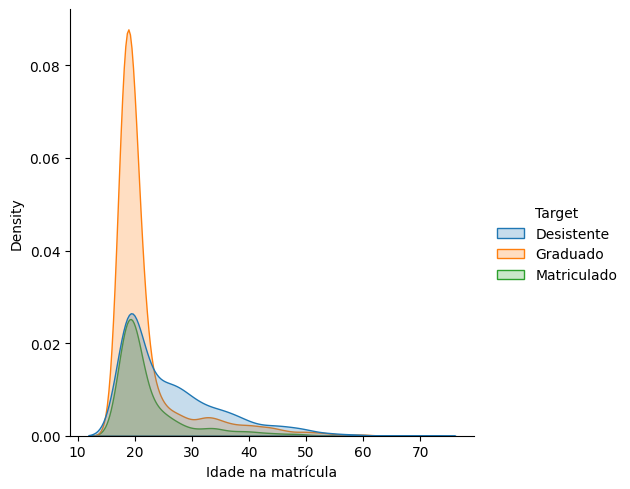

In [ ]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'} #deixando mais bonito
sns.displot(data=df, x='Idade na matrícula', hue='Target',kind='kde',fill=True);

In [ ]:
df['Estrangeiro'].value_counts(normalize=True)*100

Não    97.513562
Sim     2.486438
Name: Estrangeiro, dtype: float64

In [ ]:
df['Sexo'].value_counts(normalize=True)*100

Feminino     64.82821
Masculino    35.17179
Name: Sexo, dtype: float64

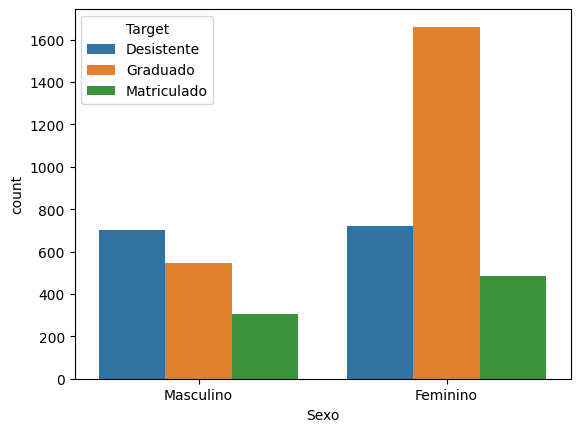

In [ ]:
sns.countplot(x='Sexo', hue='Target', data=df);

### dados economicos

se o aluno possui problemas financeiros e não possui algo como uma bolsa, ela tende a desistir

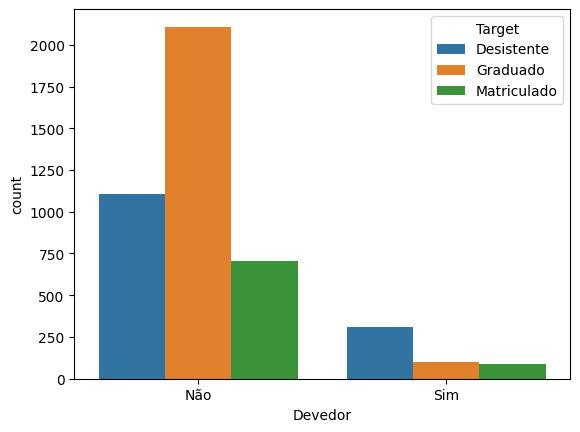

In [ ]:
sns.countplot(x= 'Devedor', hue='Target', data=df);

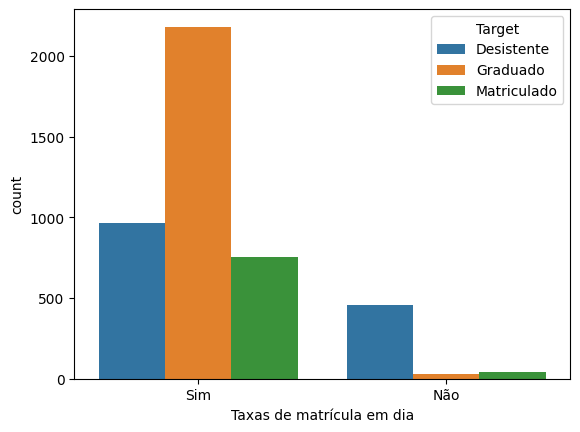

In [ ]:
sns.countplot(x= 'Taxas de matrícula em dia', hue='Target', data=df);

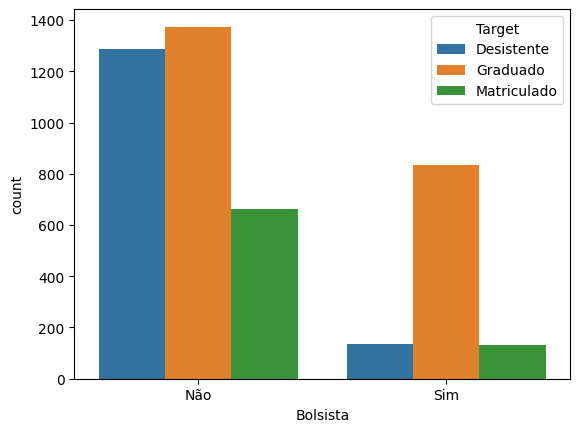

In [ ]:
sns.countplot(x= 'Bolsista', hue='Target', data=df);

### Dados do momento da matricula
alguns cursos tem um taxa de desistencia maior, cursos noturnos tambem uma taxa maior

In [ ]:
import plotly.express as px

In [ ]:
contagem = df.groupby(['Curso', 'Target']).size().reset_index(name='Contagem')

contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum())*100)

fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h',color_discrete_map=color_dict);
fig

### Dados academicos

Notas baixas tem uma taxa de desistencia maior,

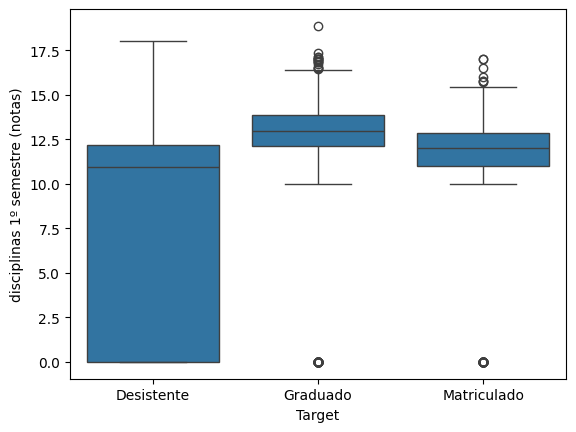

In [ ]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=df);

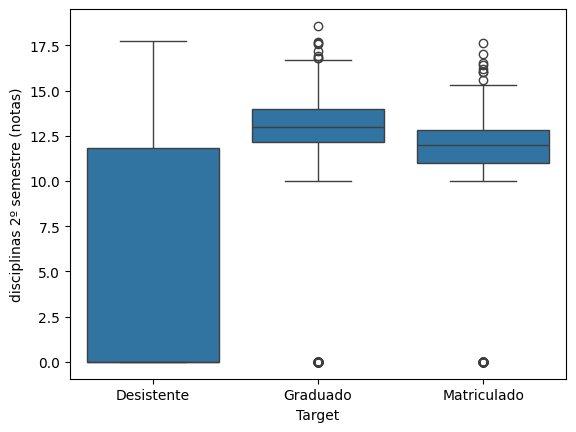

In [ ]:
sns.boxplot(x='Target', y='disciplinas 2º semestre (notas)', data=df);

In [ ]:
df['Target'].value_counts(normalize=True)*100

Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: Target, dtype: float64

### Outras variaveis

In [ ]:
# sns.countplot(x='Migração', hue='Target', data=df);
df['Necessidades educacionais especiais'].value_counts(normalize=True)*100

Sim    54.837251
Não    45.162749
Name: Migração, dtype: float64

In [ ]:
# sns.boxplot(x='Target', y='Taxa de desemprego', data=df);
# sns.boxplot(x='Target', y='Taxa de inflação', data=df);
# sns.boxplot(x='Target', y='PIB', data=df);


In [ ]:
df['Qualificação prévia'].value_counts(normalize=True)*100

Educação secundária                                         84.018987
Curso de especialização tecnológica                          4.950271
Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente     3.661844
Educação superior - licenciatura                             2.848101
Outro - 11º ano de escolaridade                              1.017179
Educação superior - licenciatura (1º ciclo)                  0.904159
Curso técnico superior profissional                          0.813743
Educação superior - bacharelado                              0.519892
Frequência de educação superior                              0.361664
12º ano de escolaridade - não concluído                      0.248644
Educação superior - mestrado                                 0.180832
Educação básica 2º ciclo (6º/7º/8º ano) ou equivalente       0.158228
Educação superior - mestrado (2º ciclo)                      0.135624
11º ano de escolaridade - não concluído                      0.090416
10º ano de escolarid

## Treinamento do modelo

### One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']

In [ ]:
encoder = OneHotEncoder(drop='if_binary')

df_categorico = df[colunas_categoricas]

In [ ]:
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))

In [ ]:
df_final = pd.concat([df.drop(colunas_categoricas, axis=1), df_encoded], axis=1)
df_final.head()

### Divisao teste, treino e validação

In [ ]:
X = df_final.drop('Target', axis=1)
y = df_final['Target']

In [ ]:
from sklearn.model_selection import train_test_split

X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)

X_treino, X_val, y_treino, y_val = train_test_split(X, y, stratify=y, random_state=0)

### Criando o modelo (random forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=10)

modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)

print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')


Acurácia de treino: 0.9023779724655819
Acurácia de validação: 0.7809762202753442


### Usando outro modelo

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(random_state=0)

modelo_gb.fit(X_treino, y_treino)

y_pred_gb = modelo_gb.predict(X_val)

print(f'Acurácia de treino: {modelo_gb.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_gb.score(X_val, y_val)}')


Acurácia de treino: 0.8452231956612433
Acurácia de validação: 0.7834793491864831


## Avaliando o modelo

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

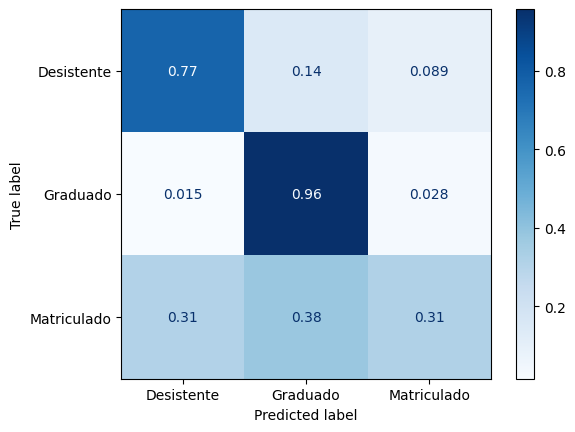

In [ ]:
matriz_confusao = confusion_matrix(y_val, y_pred)
# ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [ ]:
from sklearn.metrics import classification_report


print('Relatório de Classificação:\n',classification_report(y_val, y_pred))
print('recall baixo na classe Matriculado -> dados desbalanceados')

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.80      0.77      0.78       257
    Graduado       0.81      0.96      0.88       399
 Matriculado       0.57      0.31      0.41       143

    accuracy                           0.78       799
   macro avg       0.72      0.68      0.69       799
weighted avg       0.76      0.78      0.76       799

recall baixo na classe Matriculado -> dados desbalanceados


## Balanceando os dados

lembrar que balanceamento é feito nos dados de treino

In [ ]:
y_treino.value_counts()

Graduado       1196
Desistente      770
Matriculado     431
Name: Target, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=0)
x_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

y_balanceado.value_counts()

Graduado       1196
Desistente     1196
Matriculado    1196
Name: Target, dtype: int64

In [ ]:
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo.predict(X_val)

              precision    recall  f1-score   support

  Desistente       0.84      0.72      0.77       257
    Graduado       0.84      0.88      0.86       399
 Matriculado       0.47      0.52      0.49       143

    accuracy                           0.76       799
   macro avg       0.71      0.71      0.71       799
weighted avg       0.77      0.76      0.77       799
 
Aconteceu um trade off entre recall e precision



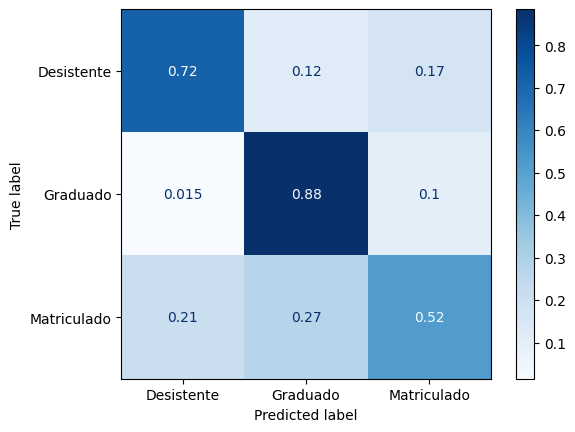

In [ ]:
print(classification_report(y_val, y_pred), '\nAconteceu um trade off entre recall e precision\n')
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');


### balanceando com outro modelo

              precision    recall  f1-score   support

  Desistente       0.80      0.73      0.76       257
    Graduado       0.83      0.88      0.86       399
 Matriculado       0.48      0.48      0.48       143

    accuracy                           0.76       799
   macro avg       0.70      0.70      0.70       799
weighted avg       0.76      0.76      0.76       799



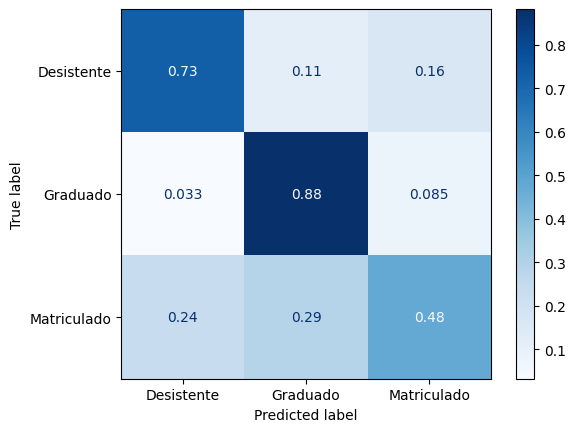

In [ ]:
modelo_gb = GradientBoostingClassifier(random_state=0)

modelo_gb.fit(x_balanceado, y_balanceado)

y_pred_gb = modelo_gb.predict(X_val)

print(classification_report(y_val, y_pred_gb))
ConfusionMatrixDisplay.from_estimator(modelo_gb, X_val, y_val, normalize = 'true', cmap = 'Blues');

## Validando o Modelo

### Validação cruzada + pipeline

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

modelo = RandomForestClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.76875   , 0.73865415, 0.76995305, 0.74960876, 0.76682316])

### Intervalo de confiança

In [ ]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()

print(f'intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')

intervalo de confiança: [0.7338084440303879, 0.7837072054218813]


## Testando o modelo com dados de teste

como melhorar modelos de ML irei ver em outros cursos

In [ ]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');